In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ls


Untitled.ipynb        user_list.csv         user_list_active.csv


In [11]:
df = pd.read_csv("user_list_active.csv", error_bad_lines=False,sep=";")

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
df.head()

,bundestag_id,nachname,vorname,wp,fraktion,twitter_handle,account_type,twitter_id,twitter_name,created_at,description,location,protected,followers_count,following_count,tweet_count,listed_count,verified,api_call
0,11000756,Gysi,Gregor,20,Fraktion DIE LINKE.,GregorGysi,person,888289790,Gregor Gysi,2012-10-18 07:20:12+00:00,"Mitglied des Bundestages, direkt gewählt in Be...","Platz der Republik, Berlin",False,475362,147,2756,1652,True,2022-05-31 19:25:12.817088
1,11000975,Hüppe,Hubert,20,Fraktion der Christlich Demokratischen Union/C...,HueppeMdB,person,1451186638894239751,Hubert Hüppe,2021-10-21 14:02:00+00:00,"🏛 Ihr Bundestagsabgeordneter für #Bergkamen, #...",Kreis Unna,False,209,100,103,18,True,2022-05-31 19:25:16.645966
2,11002666,Gröhe,Hermann,20,Fraktion der Christlich Demokratischen Union/C...,groehe,person,94363834,Hermann Gröhe,2009-12-03 16:38:02+00:00,Bundestagsabgeordneter aus dem Rhein-Kreis Neu...,Berlin,False,48943,921,3890,739,True,2022-05-31 19:25:16.825570
3,11002718,Laschet,Armin,20,Fraktion der Christlich Demokratischen Union/C...,ArminLaschet,person,835541664,Armin Laschet,2012-09-20 13:13:25+00:00,Mitglied des Deutschen Bundestages. Vizepräsid...,Aachen / Berlin,False,190026,925,15967,1264,True,2022-05-31 19:25:17.014689
4,11002720,Lemke,Steffi,20,Fraktion BÜNDNIS 90/DIE GRÜNEN,SteffiLemke,person,17229513,SteffiLemke,2008-11-07 11:07:46+00:00,Bundesumweltministerin @BMUV | Mitglied des De...,NaN,False,27006,1191,12143,748,True,2022-05-31 19:25:17.194648


# How is the account/twitter distribution among the parties?

In [89]:
df_dis=df["fraktion"].value_counts()

Fraktion der Sozialdemokratischen Partei Deutschlands                       149
Fraktion der Christlich Demokratischen Union/Christlich - Sozialen Union    132
Fraktion BÜNDNIS 90/DIE GRÜNEN                                              112
Fraktion der Freien Demokratischen Partei                                    89
Alternative für Deutschland                                                  68
Fraktion DIE LINKE.                                                          36
Fraktionslos                                                                  2
Name: fraktion, dtype: int64

# Whats the average follower count per party?

In [21]:
df.groupby(["fraktion"]).mean()["followers_count"]

fraktion
Alternative für Deutschland                                                  9923.838235
Fraktion BÜNDNIS 90/DIE GRÜNEN                                              19788.803571
Fraktion DIE LINKE.                                                         46958.583333
Fraktion der Christlich Demokratischen Union/Christlich - Sozialen Union    12291.598485
Fraktion der Freien Demokratischen Partei                                   15479.337079
Fraktion der Sozialdemokratischen Partei Deutschlands                       23274.093960
Fraktionslos                                                                 2422.000000
Name: followers_count, dtype: float64

# Which users have the most followers?


In [39]:
popular_users=df.sort_values('followers_count')[[ "twitter_name","followers_count"]].tail(20)

In [40]:
popular_users

,twitter_name,followers_count
147,Saskia Esken,106411
14,Hubertus Heil,116478
19,Jürgen Trittin,117971
350,Marie-Agnes Strack-Zimmermann,120572
57,Katja Kipping,132069
49,Lars Klingbeil 🇪🇺,143528
361,Alice Weidel,162567
3,Armin Laschet,190026
13,Katrin Göring-Eckardt,213984
6,Friedrich Merz,228224


<AxesSubplot:xlabel='followers_count', ylabel='twitter_name'>

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 127466 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 127466 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0, flags=flags)


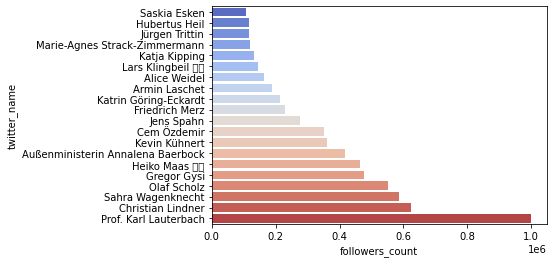

In [41]:
sns.barplot(x="followers_count",y="twitter_name",  data=popular_users,palette="coolwarm")

# Who is verified? 

# How many are verified ?

<AxesSubplot:xlabel='verified', ylabel='count'>

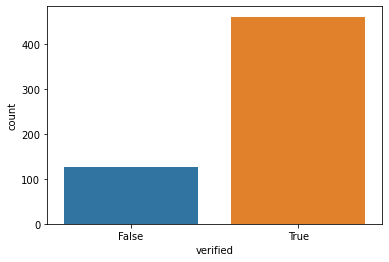

In [51]:
sns.countplot(x="verified", data=df)

In [67]:
df.groupby(["fraktion","verified"]).count().reset_index()

,fraktion,verified,bundestag_id,nachname,vorname,wp,twitter_handle,account_type,twitter_id,twitter_name,created_at,description,location,protected,followers_count,following_count,tweet_count,listed_count,api_call
0,Alternative für Deutschland,False,44,44,44,44,44,44,44,44,44,43,37,44,44,44,44,44,44
1,Alternative für Deutschland,True,24,24,24,24,24,24,24,24,24,24,21,24,24,24,24,24,24
2,Fraktion BÜNDNIS 90/DIE GRÜNEN,False,12,12,12,12,12,12,12,12,12,12,10,12,12,12,12,12,12
3,Fraktion BÜNDNIS 90/DIE GRÜNEN,True,100,100,100,100,100,100,100,100,100,100,83,100,100,100,100,100,100
4,Fraktion DIE LINKE.,False,5,5,5,5,5,5,5,5,5,4,4,5,5,5,5,5,5
5,Fraktion DIE LINKE.,True,31,31,31,31,31,31,31,31,31,31,24,31,31,31,31,31,31
6,Fraktion der Christlich Demokratischen Union/C...,False,21,21,21,21,21,21,21,21,21,18,11,21,21,21,21,21,21
7,Fraktion der Christlich Demokratischen Union/C...,True,111,111,111,111,111,111,111,111,111,110,86,111,111,111,111,111,111
8,Fraktion der Freien Demokratischen Partei,False,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
9,Fraktion der Freien Demokratischen Partei,True,79,79,79,79,79,79,79,79,79,79,76,79,79,79,79,79,79


In [68]:
verified_count_fraction=df.groupby(["fraktion","verified"]).count().reset_index()[["fraktion","verified","bundestag_id"]]

In [78]:

verified_count_fraction

,fraktion,verified,bundestag_id
0,Alternative für Deutschland,False,44
1,Alternative für Deutschland,True,24
2,Fraktion BÜNDNIS 90/DIE GRÜNEN,False,12
3,Fraktion BÜNDNIS 90/DIE GRÜNEN,True,100
4,Fraktion DIE LINKE.,False,5
5,Fraktion DIE LINKE.,True,31
6,Fraktion der Christlich Demokratischen Union/C...,False,21
7,Fraktion der Christlich Demokratischen Union/C...,True,111
8,Fraktion der Freien Demokratischen Partei,False,10
9,Fraktion der Freien Demokratischen Partei,True,79


# How many Fraction members are verified

In [80]:
veri_yes=verified_count_fraction.loc[verified_count_fraction['verified'] == True]

In [81]:
veri_yes

,fraktion,verified,bundestag_id
1,Alternative für Deutschland,True,24
3,Fraktion BÜNDNIS 90/DIE GRÜNEN,True,100
5,Fraktion DIE LINKE.,True,31
7,Fraktion der Christlich Demokratischen Union/C...,True,111
9,Fraktion der Freien Demokratischen Partei,True,79
11,Fraktion der Sozialdemokratischen Partei Deuts...,True,115
13,Fraktionslos,True,1


<AxesSubplot:xlabel='bundestag_id', ylabel='fraktion'>

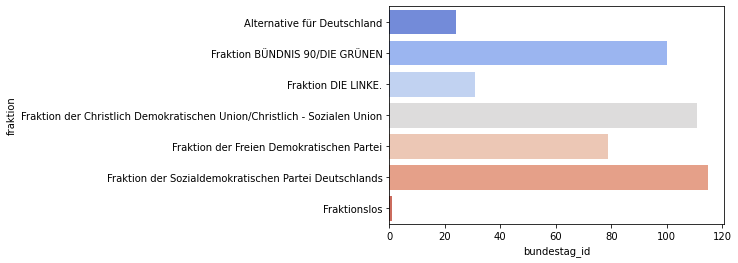

In [84]:
sns.barplot(x="bundestag_id",y="fraktion",data=veri_yes,palette="coolwarm")

# How many Fraction members are verified

<AxesSubplot:xlabel='bundestag_id', ylabel='fraktion'>

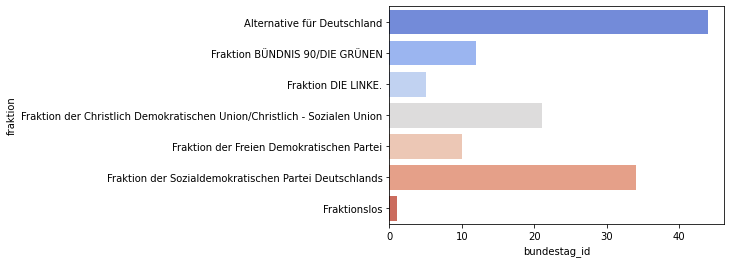

In [86]:
veri_no=verified_count_fraction.loc[verified_count_fraction['verified'] == False]
sns.barplot(x="bundestag_id",y="fraktion",data=veri_no,palette="coolwarm")